# **I. ĐỌC VÀ TIỀN XỬ LÝ DỮ LIỆU THEO CHỦ ĐỀ D50: THIẾU MÁU DO THIẾU SẮT(GỒM CÁC MÃ BỆNH NHÂN: D500, D508 và D509)**


# 🔹 1.1. Kết nối với Google Drive

Trước khi làm việc với dữ liệu lưu trên Google Drive, bạn cần kết nối Drive với Google Colab để có thể truy cập file. Lệnh drive.mount('/content/drive') giúp bạn gắn Drive cá nhân vào môi trường làm việc Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🔹 1.2. Đọc dữ liệu từ file Excel

Sử dụng thư viện pandas, bạn đọc hai bảng dữ liệu từ thư mục Google Drive:


*   admission.xlsx: chứa thông tin nhập viện của bệnh nhân
*   diagnosis.xlsx: chứa mã ICD10 chẩn đoán cho mỗi bệnh nhân



In [2]:
# Import thư viện
import pandas as pd

# Đường dẫn thư mục trong Google Drive
path = '/content/drive/Shared drives/Mã hoá bệnh tật_Nhóm 5/Data2/'

# Đọc dữ liệu từ Drive
admission_df = pd.read_excel(path + 'admission.xlsx')
diagnosis_df = pd.read_excel(path + 'diagnosis.xlsx')

# Cấu hình để hiển thị toàn bộ bảng (không giới hạn số dòng/cột)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Hiển thị toàn bộ bảng admission
print("📄 TOÀN BỘ BẢNG ADMISSION:")
display(admission_df.sample(20))

# Hiển thị toàn bộ bảng diagnosis
print("\n📄 TOÀN BỘ BẢNG DIAGNOSIS:")
display(diagnosis_df.sample(20))

📄 TOÀN BỘ BẢNG ADMISSION:


,admission_id,Unnamed: 1,Gender,age_years,age_mths,age_days,los,sameday,weight,admsource,admtype,care,sepmode,nat_drg_code,F13
61347,22114018,NaN,2,66,NaN,NaN,1,Y,NaN,H,O,4,H,I19B,NaN
3297,21046262,NaN,2,65,NaN,NaN,3,N,NaN,H,C,4,H,I13B,NaN
63370,22162518,NaN,1,25,NaN,NaN,1,N,NaN,H,C,4,H,X62B,NaN
66008,22200402,NaN,1,5,NaN,NaN,1,N,NaN,H,C,4,H,I13B,NaN
49467,21897585,NaN,1,44,NaN,NaN,2,N,NaN,H,X,4,H,I23Z,NaN
49996,21908336,NaN,1,21,NaN,NaN,1,Y,NaN,H,C,4,H,X62B,NaN
16533,21291000,NaN,2,86,NaN,NaN,3,N,NaN,H,C,4,H,X60B,NaN
48565,21880639,NaN,1,0,0.0,11.0,1,N,3350.0,H,C,4,H,P67D,NaN
46782,21846260,NaN,1,86,NaN,NaN,1,Y,NaN,H,C,4,H,E75B,NaN
30574,21548898,NaN,2,62,NaN,NaN,3,N,NaN,T,C,4,H,I30Z,NaN



📄 TOÀN BỘ BẢNG DIAGNOSIS:


,admission_id,position,diagnosis,Other
179922,21066080,8,S610,P
224952,21525371,2,T3100,P
109924,21382850,5,R33,P
182807,21581713,1,S611,P
471458,22478035,3,Y9283,P
80594,21373066,23,M0697,P
304466,21777744,5,U739,P
221700,22109221,1,T150,P
214958,22482982,4,S836,P
208883,21323867,3,S8218,P


# 🔹  1.3. Lọc các chẩn đoán theo mã ICD10

Nhóm em tập trung phân tích các bệnh nhân có mã chẩn đoán:

- D500: Thiếu máu thiếu sắt do mất máu mạn tính

- D508: Thiếu máu thiếu sắt khác

- D509: Thiếu máu thiếu sắt không xác định

Lọc các dòng trong bảng diagnosis có mã ICD thuộc danh sách trên.

In [3]:
# Lọc các mã ICD10 là D500, D508, D509
target_icds = ['D500', 'D508', 'D509']
filtered_diag = diagnosis_df[diagnosis_df['diagnosis'].isin(target_icds)]

# 🔹 1.4. Lấy danh sách các admission_id tương ứng

Từ bảng diagnosis đã lọc, chúng tôi trích ra tất cả các admission_id liên quan đến các bệnh nhân mang mã D500, D508, D509.

In [4]:
# Lấy danh sách ID phù hợp
matching_ids = filtered_diag['admission_id'].unique()

# 🔹 1.5. Lọc bảng Admission và Diagnosis tương ứng

Từ bảng `admission.xlsx`, chỉ giữ lại những dòng có `admission_id` tương ứng với các bệnh nhân đã được lọc trong bảng `diagnosis` ở bước trước — tức là các bệnh nhân có mã bệnh thuộc nhóm thiếu máu do thiếu sắt (D500, D508, D509). Việc này giúp đảm bảo rằng chỉ những lượt nhập viện liên quan đến vấn đề sức khỏe đang được nghiên cứu mới được đưa vào phân tích chuyên sâu tiếp theo.

In [5]:
# Lọc admission tương ứng với các ID
filtered_admission = admission_df[admission_df['admission_id'].isin(matching_ids)]

In [6]:
# 🔍 Lọc các dòng có Diagnosis bắt đầu bằng D500, D508, hoặc D509
filtered_df = diagnosis_df[diagnosis_df['diagnosis'].str.match(r'^D500|^D508|^D509', na=False)]

# 🔹 1.6. Xuất file Excel kết quả

Dữ liệu sau khi lọc được lưu vào file mới: `filtered_admission.xlsx` và `diagnosis_chi_D500_D508_D509`


In [7]:
# Xuất file kết quả vào lại Google Drive
filtered_admission.to_excel(path + 'filtered_admission.xlsx', index=False)
print("✅ File filtered_admission.xlsx đã được lưu vào Google Drive.")

✅ File filtered_admission.xlsx đã được lưu vào Google Drive.


In [8]:
# Xuất file vào Google Drive
output_path = path + "diagnosis_chi_D500_D508_D509.xlsx"
filtered_df.to_excel(output_path, index=False)

print("✅ Đã lưu thành công file:", output_path)

✅ Đã lưu thành công file: /content/drive/Shared drives/Mã hoá bệnh tật_Nhóm 5/Data2/diagnosis_chi_D500_D508_D509.xlsx


# 🔹 1.7. Kiểm tra độ nhất quán dữ liệu

Nhóm tiến hành kiểm tra tính nhất quán của dữ liệu bằng cách so sánh các mã định danh giữa các bảng gốc và bảng đã lọc, cụ thể:

✅ Đối với bảng `admission`:

- So sánh danh sách `admission_id` giữa bảng gốc và bảng đã lọc.

- Đảm bảo rằng tất cả các dòng trong bảng lọc đều thực sự tồn tại trong bảng gốc và không có dữ liệu bị thiếu, trùng hoặc sai lệch.

- Nếu phát hiện `admission_id` không khớp, hệ thống sẽ in ra để người dùng kiểm tra thủ công.

✅ Đối với bảng `diagnosis`:

- Kiểm tra tính nhất quán của cột Diagnosis giữa bảng diagnosis đã lọc và bảng gốc.

- Đảm bảo rằng tất cả các dòng trong bảng lọc đều chứa các chẩn đoán thực sự có trong bảng gốc.

- Nếu phát hiện có dòng chẩn đoán bị sai mã hoặc không tồn tại trong dữ liệu ban đầu, hệ thống sẽ in ra danh sách Diagnosis không khớp để kiểm tra lại.

In [9]:
# Kiểm tra admission_id
original_ids = set(admission_df['admission_id'])
filtered_ids = set(filtered_admission['admission_id'])

if filtered_ids.issubset(original_ids):
    print("✅ Tất cả admission_id trong file lọc đều trùng khớp với file gốc.")
else:
    missing_ids = filtered_ids - original_ids
    print("⚠️ Một số admission_id không tìm thấy trong file gốc:")
    print(missing_ids)


✅ Tất cả admission_id trong file lọc đều trùng khớp với file gốc.


In [10]:
# Kiểm tra chẩn đoán (Diagnosis)
original_diag_ids = set(diagnosis_df['diagnosis'])
filtered_diag_ids = set(filtered_df['diagnosis'])

if filtered_diag_ids.issubset(original_diag_ids):
    print("✅ Tất cả ID trong file diagnosis đã lọc đều trùng khớp với file gốc.")
else:
    missing_diag_ids = filtered_diag_ids - original_diag_ids
    print("⚠️ Một số ID không tìm thấy trong file diagnosis gốc:")
    print(missing_diag_ids)

✅ Tất cả ID trong file diagnosis đã lọc đều trùng khớp với file gốc.


# 🔹 1.8. Hiển thị bảng admission và diagnosis

In [11]:
# Hiển thị bảng admission sau khi lọc
print("\n📋 Dữ liệu admission đã lọc:")
display(filtered_admission)


📋 Dữ liệu admission đã lọc:


,admission_id,Unnamed: 1,Gender,age_years,age_mths,age_days,los,sameday,weight,admsource,admtype,care,sepmode,nat_drg_code,F13
196,21003401,NaN,1,79,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN
229,21005617,NaN,1,38,NaN,NaN,10,N,NaN,H,O,4,H,T61A,NaN
407,21006989,NaN,1,56,NaN,NaN,5,N,NaN,H,C,4,H,X62A,NaN
503,21008125,NaN,2,84,NaN,NaN,57,N,NaN,T,X,9,B,I78A,NaN
638,21009348,NaN,2,89,NaN,NaN,9,N,NaN,H,C,4,T,X07A,NaN
699,21010023,NaN,1,76,NaN,NaN,27,N,NaN,H,C,4,T,A06B,NaN
718,21010293,NaN,1,87,NaN,NaN,1,N,NaN,H,C,4,S,C62Z,NaN
749,21010597,NaN,1,87,NaN,NaN,1,N,NaN,S,S,9,T,C62Z,NaN
750,21010607,NaN,2,84,NaN,NaN,27,N,NaN,S,S,9,B,I78A,NaN
781,21010899,NaN,1,53,NaN,NaN,14,N,NaN,H,C,4,T,I08A,NaN


In [12]:
# Hiển thị bảng diagnosis sau khi lọc
print("\n📋 Dữ liệu diagnosis đã lọc:")
display(filtered_df)


📋 Dữ liệu diagnosis đã lọc:


,admission_id,position,diagnosis,Other
9651,21003401,6,D500,P
9652,21010023,30,D500,C
9653,21010607,8,D500,P
9654,21010899,21,D500,C
9655,21010945,11,D500,P
9656,21011801,6,D500,P
9657,21015485,8,D500,P
9658,21015970,16,D500,C
9659,21024501,5,D500,P
9660,21026342,5,D500,P


# **II. THỐNG KÊ TỔNG QUAN TOÀN BỘ DỮ LIỆU**


# 🔹 2.1. Kiểm tra các cột dữ liệu sau khi gộp

Sau khi gộp 3 bảng `diagnosis_chi_D500_D508_D509.xlsx`, `filtered_admission.xlsx`, và `ICD10`, ta kiểm tra danh sách các cột hiện có trong bảng `merged_df`. Điều này giúp nắm được cấu trúc dữ liệu sau tiền xử lý, để xác định các trường cần thiết cho các bước phân tích sau.

In [13]:
import pandas as pd
from IPython.display import display

# Đường dẫn thư mục trong Google Drive
path = '/content/drive/Shared drives/Mã hoá bệnh tật_Nhóm 5/Data2/'
# Đọc các file Excel
diagnosis_df = pd.read_excel(path+ "diagnosis_chi_D500_D508_D509.xlsx")
admission_df = pd.read_excel(path+"filtered_admission.xlsx")
icd10_df = pd.read_excel(path+"ICD10.xlsx")


# Cấu hình hiển thị đầy đủ
pd.set_option("display.max_columns", None)      # Hiện tất cả cột
pd.set_option("display.width", None)            # Không giới hạn độ rộng
pd.set_option("display.max_rows", None)         # ⚠️ Hiện toàn bộ dòng (cẩn thận nếu >1000 dòng)
pd.set_option("display.max_colwidth", None)     # Không cắt nội dung ô

In [14]:
# Gộp diagnosis và admission
merged_df = diagnosis_df.merge(admission_df, on="admission_id", how="inner")
print(f"\n✅ Số dòng sau khi gộp DIAGNOSIS với ADMISSION: {len(merged_df)}")
display(merged_df)  # 👉 Hiển thị toàn bộ bảng



✅ Số dòng sau khi gộp DIAGNOSIS với ADMISSION: 677


,admission_id,position,diagnosis,Other,Unnamed: 1,Gender,age_years,age_mths,age_days,los,sameday,weight,admsource,admtype,care,sepmode,nat_drg_code,F13
0,21003401,6,D500,P,NaN,1,79,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN
1,21010023,30,D500,C,NaN,1,76,NaN,NaN,27,N,NaN,H,C,4,T,A06B,NaN
2,21010607,8,D500,P,NaN,2,84,NaN,NaN,27,N,NaN,S,S,9,B,I78A,NaN
3,21010899,21,D500,C,NaN,1,53,NaN,NaN,14,N,NaN,H,C,4,T,I08A,NaN
4,21010945,11,D500,P,NaN,1,84,NaN,NaN,3,N,NaN,H,C,4,D,B78A,NaN
5,21011801,6,D500,P,NaN,1,45,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN
6,21015485,8,D500,P,NaN,2,61,NaN,NaN,11,N,NaN,H,C,4,T,E01A,NaN
7,21015970,16,D500,C,NaN,1,77,NaN,NaN,14,N,NaN,S,S,4,S,T01A,NaN
8,21024501,5,D500,P,NaN,2,39,NaN,NaN,1,Y,NaN,H,X,4,H,X60B,NaN
9,21026342,5,D500,P,NaN,1,78,NaN,NaN,9,N,NaN,T,O,4,H,X06A,NaN


In [15]:
# Gộp thêm mô tả bệnh ICD10
merged_df = merged_df.merge(icd10_df, left_on="diagnosis", right_on="code", how="left")
print(f"\n✅ Số dòng sau khi gộp thêm ICD10: {len(merged_df)}")
display(merged_df)  # 👉 Hiển thị toàn bộ bảng


✅ Số dòng sau khi gộp thêm ICD10: 677


,admission_id,position,diagnosis,Other,Unnamed: 1,Gender,age_years,age_mths,age_days,los,sameday,weight,admsource,admtype,care,sepmode,nat_drg_code,F13,code,description
0,21003401,6,D500,P,NaN,1,79,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
1,21010023,30,D500,C,NaN,1,76,NaN,NaN,27,N,NaN,H,C,4,T,A06B,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
2,21010607,8,D500,P,NaN,2,84,NaN,NaN,27,N,NaN,S,S,9,B,I78A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
3,21010899,21,D500,C,NaN,1,53,NaN,NaN,14,N,NaN,H,C,4,T,I08A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
4,21010945,11,D500,P,NaN,1,84,NaN,NaN,3,N,NaN,H,C,4,D,B78A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
5,21011801,6,D500,P,NaN,1,45,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
6,21015485,8,D500,P,NaN,2,61,NaN,NaN,11,N,NaN,H,C,4,T,E01A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
7,21015970,16,D500,C,NaN,1,77,NaN,NaN,14,N,NaN,S,S,4,S,T01A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
8,21024501,5,D500,P,NaN,2,39,NaN,NaN,1,Y,NaN,H,X,4,H,X60B,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)
9,21026342,5,D500,P,NaN,1,78,NaN,NaN,9,N,NaN,T,O,4,H,X06A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic)


# 🔹 2.2. Phân nhóm tuổi
Để thuận tiện cho việc phân tích, tuổi `age_years` của bệnh nhân được phân chia thành các nhóm tuổi như sau:

- 0–9 tuổi

- 10–19 tuổi

- 20–29 tuổi

- 30–39 tuổi

- 40–49 tuổi

- 50–59 tuổi

- 60 tuổi trở lên

Việc phân nhóm này giúp dễ dàng thống kê và so sánh các đặc điểm y tế giữa các nhóm tuổi khác nhau.

In [16]:
# Phân nhóm tuổi
def get_age_group(age):
    if age < 10:
        return "0-9"
    elif age < 20:
        return "10-19"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    elif age < 60:
        return "50-59"
    else:
        return "60+"

merged_df["age_group"] = merged_df["age_years"].apply(get_age_group)

# Hiển thị đầy đủ
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)


# 🔹 2.3. Hiển thị 5 dòng dữ liệu đầu tiên
Xem trước 5 dòng đầu tiên của bảng `merged_df` để kiểm tra trực quan xem dữ liệu đã được gộp và xử lý đúng chưa (bao gồm thông tin chẩn đoán, tuổi, giới tính, mô tả bệnh...).

In [17]:
# Hiển thị 5 dòng đầu
print("\n📌 DỮ LIỆU MẪU:")
display(merged_df.head())


📌 DỮ LIỆU MẪU:


,admission_id,position,diagnosis,Other,Unnamed: 1,Gender,age_years,age_mths,age_days,los,sameday,weight,admsource,admtype,care,sepmode,nat_drg_code,F13,code,description,age_group
0,21003401,6,D500,P,NaN,1,79,NaN,NaN,2,N,NaN,H,C,4,H,X63A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic),60+
1,21010023,30,D500,C,NaN,1,76,NaN,NaN,27,N,NaN,H,C,4,T,A06B,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic),60+
2,21010607,8,D500,P,NaN,2,84,NaN,NaN,27,N,NaN,S,S,9,B,I78A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic),60+
3,21010899,21,D500,C,NaN,1,53,NaN,NaN,14,N,NaN,H,C,4,T,I08A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic),50-59
4,21010945,11,D500,P,NaN,1,84,NaN,NaN,3,N,NaN,H,C,4,D,B78A,NaN,D500,Iron deficiency anemia secondary to blood loss (chronic),60+


# 🔹 2.4. Thống kê phân bố theo nhóm tuổi
Sử dụng biến `age_group` đã tạo, ta thống kê số lượng bệnh nhân trong mỗi nhóm tuổi. Thống kê này giúp nhận diện nhóm tuổi nào có tỉ lệ mắc bệnh cao hơn, từ đó hỗ trợ định hướng phân tích chuyên sâu ở các bước sau.


3. PHÂN BỐ ĐỘ TUỔI


,Nhóm tuổi,Số lượng bệnh nhân,Tỷ lệ (%)
0,0-9,10,4.59
1,10-19,12,5.50
2,20-29,21,9.63
3,30-39,20,9.17
4,40-49,25,11.47
5,50-59,47,21.56
6,60+,83,38.07


/tmp/ipython-input-18-3181185788.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=age_table, x='Nhóm tuổi', y='Số lượng bệnh nhân', palette='viridis')


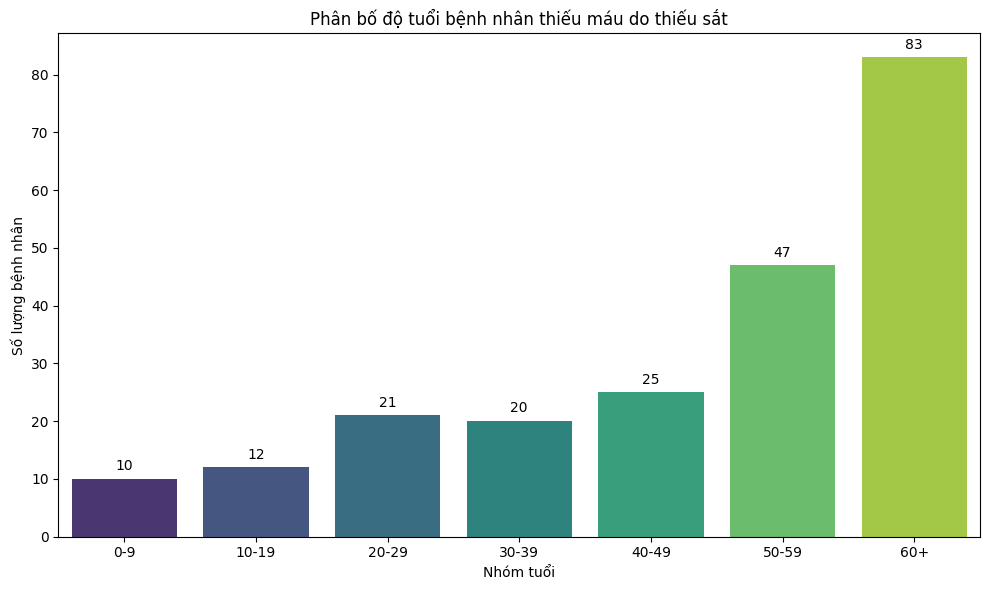

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

print("\n3. PHÂN BỐ ĐỘ TUỔI")

# Tạo nhóm tuổi
admission_df['age_group'] = pd.cut(admission_df['age_years'],
                                  bins=[0, 10, 20, 30, 40, 50, 60, 70],
                                  labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+'])

# Tạo bảng phân bố độ tuổi
age_dist = admission_df['age_group'].value_counts().sort_index()
age_table = pd.DataFrame({
    'Nhóm tuổi': age_dist.index,
    'Số lượng bệnh nhân': age_dist.values,
    'Tỷ lệ (%)': (age_dist.values / age_dist.values.sum() * 100).round(2)
})

# Hiển thị bảng dưới dạng đẹp
display(HTML("<h4>Bảng phân bố bệnh nhân theo nhóm tuổi</h4>"))
display(age_table)

# Biểu đồ nâng cấp: Màu gradient + thêm nhãn số
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_table, x='Nhóm tuổi', y='Số lượng bệnh nhân', palette='viridis')

# Thêm nhãn trên đầu cột
for i, value in enumerate(age_table['Số lượng bệnh nhân']):
    barplot.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Phân bố độ tuổi bệnh nhân thiếu máu do thiếu sắt')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.show()


# 🔹 2.5. Thống kê phân bố theo giới tính
Phân tích phân bố bệnh nhân theo giới tính (ví dụ: nam (1), nữ (2)) giúp đánh giá xem có sự khác biệt giới trong bệnh lý thiếu máu do thiếu sắt hay không. Đây là một chỉ báo quan trọng trong y tế công cộng.


📊 PHÂN BỐ GIỚI TÍNH:


,Gender,Count
0,2,429
1,1,248


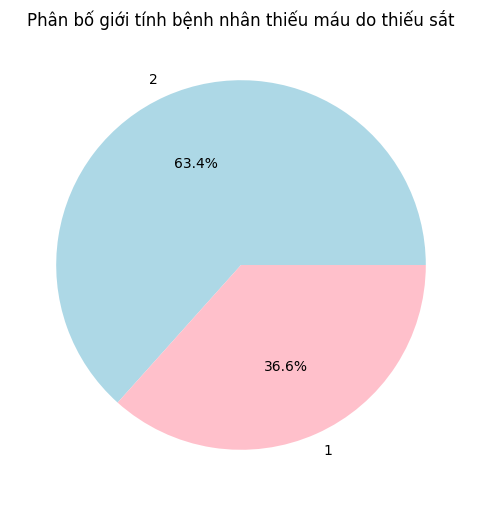

In [19]:
# Thống kê theo giới tính
print("\n📊 PHÂN BỐ GIỚI TÍNH:")
gender_counts = merged_df["Gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]
display(gender_counts)

gender_dist = gender_counts.set_index("Gender")["Count"]

plt.figure(figsize=(8, 6))
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Phân bố giới tính bệnh nhân thiếu máu do thiếu sắt')
plt.ylabel('')
plt.show()


# 🔹 2.6. Thống kê 5 chẩn đoán phổ biến nhất
Dựa vào cột mô tả chẩn đoán `description`, thống kê 5 chẩn đoán ICD10 xuất hiện nhiều nhất trong toàn bộ dữ liệu. Kết quả này cho thấy những dạng thiếu máu thiếu sắt nào đang phổ biến nhất trong cộng đồng bệnh nhân được khảo sát.

,Mã chẩn đoán,Số lượng bệnh nhân,Tỷ lệ (%)
0,D509,316,46.68
1,D500,294,43.43
2,D508,67,9.90


/tmp/ipython-input-20-2728204745.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=diagnosis_table, x='Mã chẩn đoán', y='Số lượng bệnh nhân',


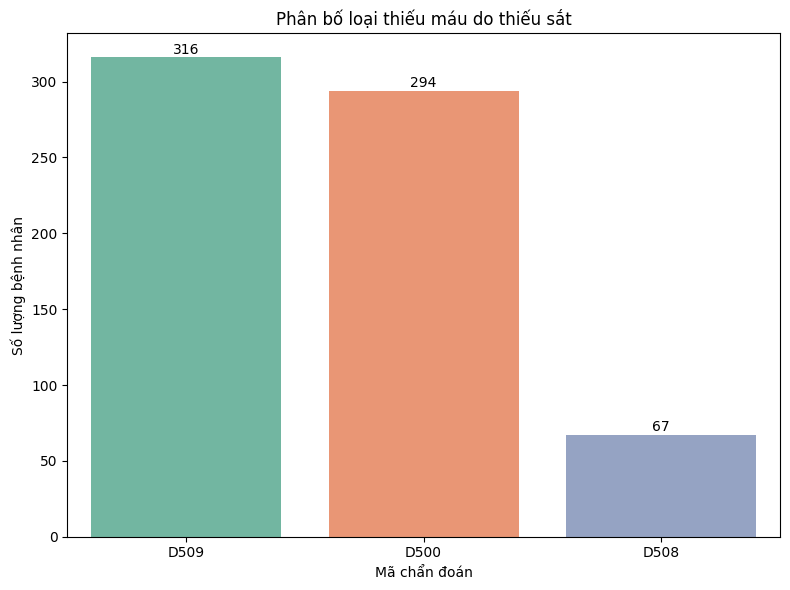

In [20]:
# Đếm số lượng từng loại thiếu máu
diagnosis_dist = diagnosis_df['diagnosis'].value_counts()
diagnosis_table = pd.DataFrame({
    'Mã chẩn đoán': diagnosis_dist.index,
    'Số lượng bệnh nhân': diagnosis_dist.values,
    'Tỷ lệ (%)': (diagnosis_dist.values / diagnosis_dist.values.sum() * 100).round(2)
})

# Hiển thị bảng dưới dạng HTML
display(HTML("<h4>Bảng phân bố loại thiếu máu do thiếu sắt</h4>"))
display(diagnosis_table)

# Biểu đồ đẹp hơn
plt.figure(figsize=(8, 6))
bar = sns.barplot(data=diagnosis_table, x='Mã chẩn đoán', y='Số lượng bệnh nhân',
                  palette='Set2')

# Thêm nhãn số
for i, value in enumerate(diagnosis_table['Số lượng bệnh nhân']):
    bar.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Phân bố loại thiếu máu do thiếu sắt')
plt.xlabel('Mã chẩn đoán')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.show()

# **III. PHÂN TÍCH DỮ LIỆU BỆNH NHÂN THIẾU MÁU DO THIẾU SẮT (D50)**

# 🔹 3.1.  Thống kê và trực quan hóa thời gian nằm viện (LOS)

,Giá trị thống kê
count,676.000000
mean,14.120000
std,25.870000
min,1.000000
25%,5.000000
50%,8.000000
75%,16.000000
max,561.000000



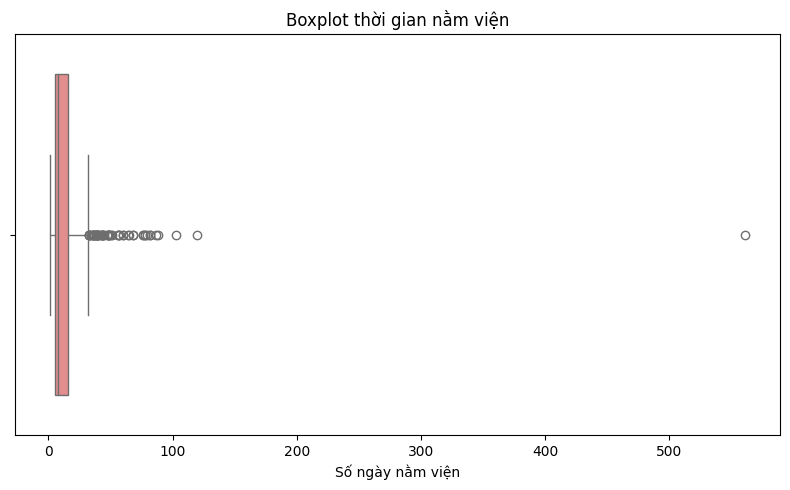
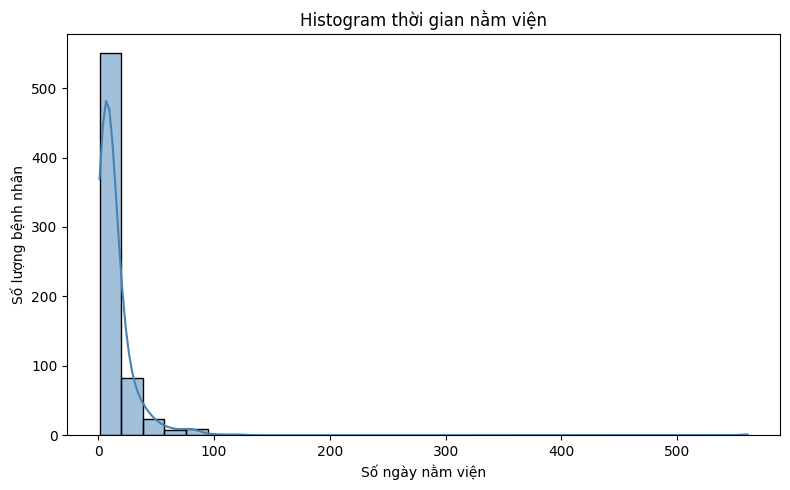

In [21]:
import matplotlib.pyplot as plt
import os
from IPython.display import HTML, display
import base64
import seaborn as sns
import pandas as pd

# Hiển thị bảng thống kê mô tả
los_stats = admission_df['los'].describe().round(2).to_frame(name="Giá trị thống kê")
display(HTML("<h4>📋 Thống kê mô tả thời gian nằm viện (ngày)</h4>"))
display(los_stats.style.set_table_attributes("style='display:inline'").set_caption("Nguồn: admission_df"))

# Tạo thư mục lưu ảnh
if not os.path.exists("charts_los"):
    os.makedirs("charts_los")

# Vẽ Boxplot
fig1, ax1 = plt.subplots(figsize=(8, 5))
sns.boxplot(x=admission_df['los'], ax=ax1, color='lightcoral')
ax1.set_title('Boxplot thời gian nằm viện')  # 👈 BỎ emoji
ax1.set_xlabel('Số ngày nằm viện')
plt.tight_layout()
boxplot_path = "charts_los/boxplot_los.png"
plt.savefig(boxplot_path, bbox_inches='tight')
plt.close(fig1)

# Vẽ Histogram
fig2, ax2 = plt.subplots(figsize=(8, 5))
sns.histplot(admission_df['los'], bins=30, kde=True, color='steelblue', ax=ax2)
ax2.set_title('Histogram thời gian nằm viện')  # 👈 BỎ emoji
ax2.set_xlabel('Số ngày nằm viện')
ax2.set_ylabel('Số lượng bệnh nhân')
plt.tight_layout()
hist_path = "charts_los/histogram_los.png"
plt.savefig(hist_path, bbox_inches='tight')
plt.close(fig2)

# Hàm tạo ảnh HTML
def img_tag_from_path(path):
    with open(path, "rb") as f:
        data = base64.b64encode(f.read()).decode("utf-8")
    return f'<img src="data:image/png;base64,{data}" style="margin-right: 40px; border:1px solid #ccc; width: 700px"/>'

# Hiển thị ảnh song song
html_code = f'''
<h4>🖼️ Biểu đồ phân bố thời gian nằm viện</h4>
<div style="display: flex; overflow-x: auto;">
    {img_tag_from_path(boxplot_path)}
    {img_tag_from_path(hist_path)}
</div>
'''
display(HTML(html_code))


# 🔹 3.2. Trực quan hóa thời gian nằm viện theo giới tính và nhóm tuổi

🎯 Các giá trị trong Gender: ['Nam' 'Nữ']
🧮 Số lượng mỗi giới tính:
 Gender
Nữ     429
Nam    247
Name: count, dtype: int64


/tmp/ipython-input-22-1694251364.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')


✅ Đã lưu: charts/hist_gender.png
✅ Đã lưu: charts/box_gender.png


/tmp/ipython-input-22-1694251364.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=admission_df, x='Gender', y='los', palette='Set3')
/tmp/ipython-input-22-1694251364.py:69: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')
/tmp/ipython-input-22-1694251364.py:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')


✅ Đã lưu: charts/hist_age.png


/tmp/ipython-input-22-1694251364.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=admission_df, x='age_group', y='los', palette='pastel')
/tmp/ipython-input-22-1694251364.py:105: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')


✅ Đã lưu: charts/box_age.png



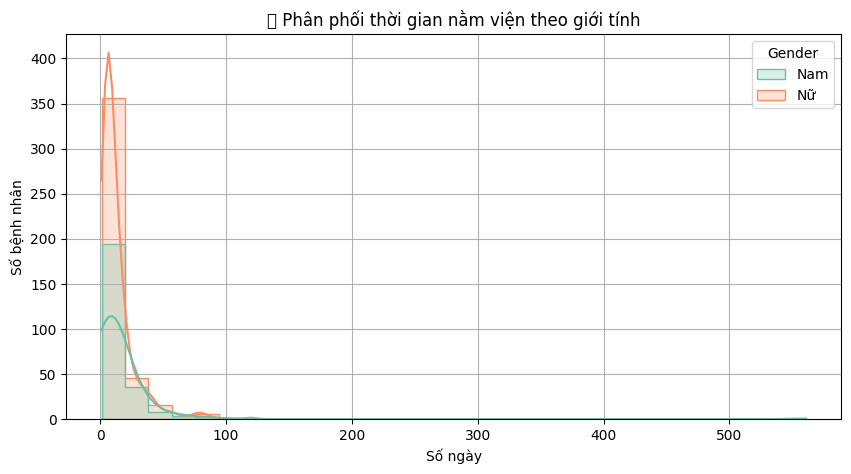
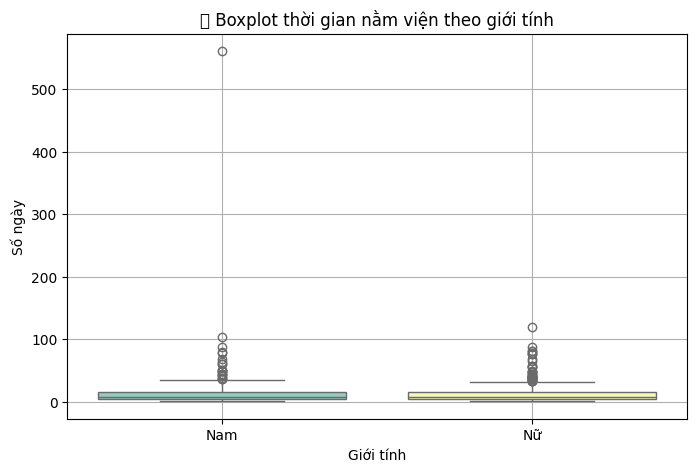
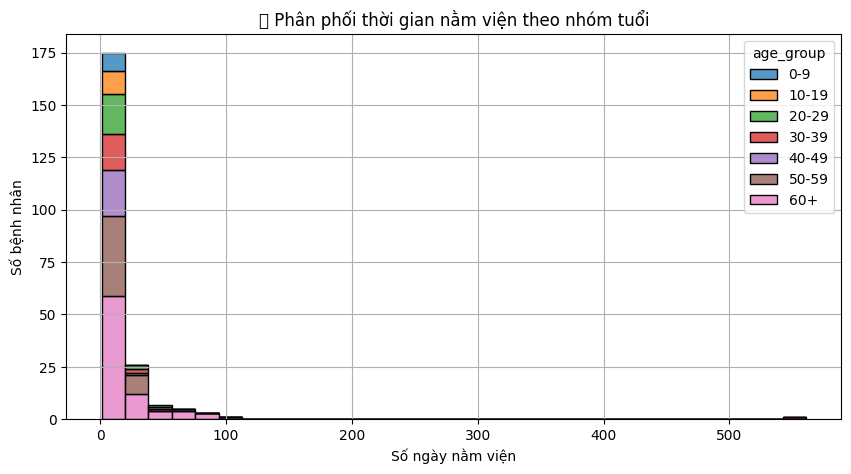
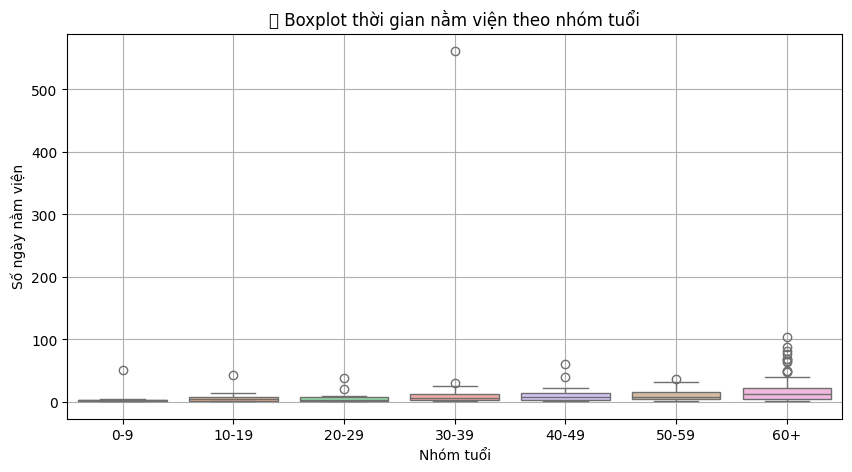

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import base64
from IPython.display import display, HTML

# --- TẠO THƯ MỤC CHỨA ẢNH ---
if not os.path.exists("charts"):
    os.makedirs("charts")

# --- TIỀN XỬ LÝ ---
admission_df['los'] = pd.to_numeric(admission_df['los'], errors='coerce')
admission_df = admission_df.dropna(subset=['los'])

# Nếu Gender có giá trị là số (1,2), thì map sang chuỗi Nam/Nữ
if 'Gender' in admission_df.columns:
    unique_vals = admission_df['Gender'].dropna().unique()
    if all(val in [1, 2] for val in unique_vals):
        admission_df['Gender'] = admission_df['Gender'].map({1: 'Nam', 2: 'Nữ'})


# --- KIỂM TRA CỘT GENDER ---
if 'Gender' in admission_df.columns:
    print("🎯 Các giá trị trong Gender:", admission_df['Gender'].unique())
    print("🧮 Số lượng mỗi giới tính:\n", admission_df['Gender'].value_counts())


# --- KIỂM TRA CỜ ---
has_gender = 'Gender' in admission_df.columns and admission_df['Gender'].dropna().nunique() >= 2
has_age_group = 'age_group' in admission_df.columns and admission_df['age_group'].dropna().nunique() > 0

if not has_gender:
    print("⚠️ Không đủ dữ liệu để vẽ biểu đồ theo giới tính.")
if not has_age_group:
    print("⚠️ Không đủ dữ liệu để vẽ biểu đồ theo nhóm tuổi.")

image_tags = []

# --- HISTOGRAM THEO GIỚI TÍNH ---
if has_gender:
    plt.figure(figsize=(10, 5))
    los_counts = admission_df.groupby('Gender')['los'].nunique()
    can_use_kde = all(los_counts >= 2)
    sns.histplot(data=admission_df, x='los', hue='Gender', bins=30, kde=can_use_kde, palette='Set2', element='step')
    plt.title('📊 Phân phối thời gian nằm viện theo giới tính')
    plt.xlabel('Số ngày')
    plt.ylabel('Số bệnh nhân')
    plt.grid(True)
    filename = "charts/hist_gender.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print("✅ Đã lưu:", filename)

    with open(filename, "rb") as f:
        img_data = base64.b64encode(f.read()).decode("utf-8")
        img_tag = f'<img src="data:image/png;base64,{img_data}" style="margin-right:20px; width:700px; border:1px solid #ccc"/>'
        image_tags.append(img_tag)

# --- BOXPLOT THEO GIỚI TÍNH ---
if has_gender:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=admission_df, x='Gender', y='los', palette='Set3')
    plt.title('📦 Boxplot thời gian nằm viện theo giới tính')
    plt.xlabel('Giới tính')
    plt.ylabel('Số ngày')
    plt.grid(True)
    filename = "charts/box_gender.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print("✅ Đã lưu:", filename)

    with open(filename, "rb") as f:
        img_data = base64.b64encode(f.read()).decode("utf-8")
        img_tag = f'<img src="data:image/png;base64,{img_data}" style="margin-right:20px; width:700px; border:1px solid #ccc"/>'
        image_tags.append(img_tag)

# --- HISTOGRAM THEO NHÓM TUỔI ---
if has_age_group:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=admission_df, x='los', hue='age_group', multiple='stack', bins=30, kde=False, palette='tab10')
    plt.title('📊 Phân phối thời gian nằm viện theo nhóm tuổi')
    plt.xlabel('Số ngày nằm viện')
    plt.ylabel('Số bệnh nhân')
    plt.grid(True)
    filename = "charts/hist_age.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print("✅ Đã lưu:", filename)

    with open(filename, "rb") as f:
        img_data = base64.b64encode(f.read()).decode("utf-8")
        img_tag = f'<img src="data:image/png;base64,{img_data}" style="margin-right:20px; width:700px; border:1px solid #ccc"/>'
        image_tags.append(img_tag)

# --- BOXPLOT THEO NHÓM TUỔI ---
if has_age_group:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=admission_df, x='age_group', y='los', palette='pastel')
    plt.title('📦 Boxplot thời gian nằm viện theo nhóm tuổi')
    plt.xlabel('Nhóm tuổi')
    plt.ylabel('Số ngày nằm viện')
    plt.grid(True)
    filename = "charts/box_age.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print("✅ Đã lưu:", filename)

    with open(filename, "rb") as f:
        img_data = base64.b64encode(f.read()).decode("utf-8")
        img_tag = f'<img src="data:image/png;base64,{img_data}" style="margin-right:20px; width:700px; border:1px solid #ccc"/>'
        image_tags.append(img_tag)

# --- HIỂN THỊ (NOTEBOOK) ---
if image_tags:
    html_code = '<div style="display: flex; overflow-x: auto;">' + ''.join(image_tags) + '</div>'
    display(HTML(html_code))
else:
    print("❌ Không có hình ảnh nào được hiển thị. Kiểm tra lại dữ liệu.")



# 🔹 3.3. Phân tích các chẩn đoán kèm theo (comorbidities)

In [23]:
# Phân tích các chẩn đoán kèm theo (comorbidities)

# Lấy tất cả chẩn đoán liên quan đến admission_id trong nhóm thiếu máu
all_diag_for_patients = diagnosis_df[diagnosis_df['admission_id'].isin(admission_df['admission_id'])]

# Loại bỏ các mã thiếu máu
comorbidities = all_diag_for_patients[~all_diag_for_patients['diagnosis'].isin(['D500', 'D508', 'D509'])]

# Đếm tần suất xuất hiện và lấy top 10
top10_comorbidities = comorbidities['diagnosis'].value_counts().head(10)

print("\n7. TOP 10 CHẨN ĐOÁN KÈM THEO PHỔ BIẾN NHẤT")
if not top10_comorbidities.empty:
    print(top10_comorbidities)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    top10_comorbidities.plot(kind='bar', color='teal')
    plt.title('Top 10 chẩn đoán kèm theo phổ biến nhất')
    plt.xlabel('Mã chẩn đoán')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Không tìm thấy chẩn đoán kèm theo nào ngoài thiếu máu.")





7. TOP 10 CHẨN ĐOÁN KÈM THEO PHỔ BIẾN NHẤT
⚠️ Không tìm thấy chẩn đoán kèm theo nào ngoài thiếu máu.


In [24]:
print(all_diag_for_patients['diagnosis'].value_counts().head(20))

diagnosis
D509    316
D500    294
D508     67
Name: count, dtype: int64


# 🔹 3.4. Phân tích nguồn nhập viện

Nguồn nhập viện,Số lượng,Tỷ lệ (%)
Nguồn H,523,77.37
Nguồn T,105,15.53
Nguồn S,36,5.33
Nguồn N,12,1.78


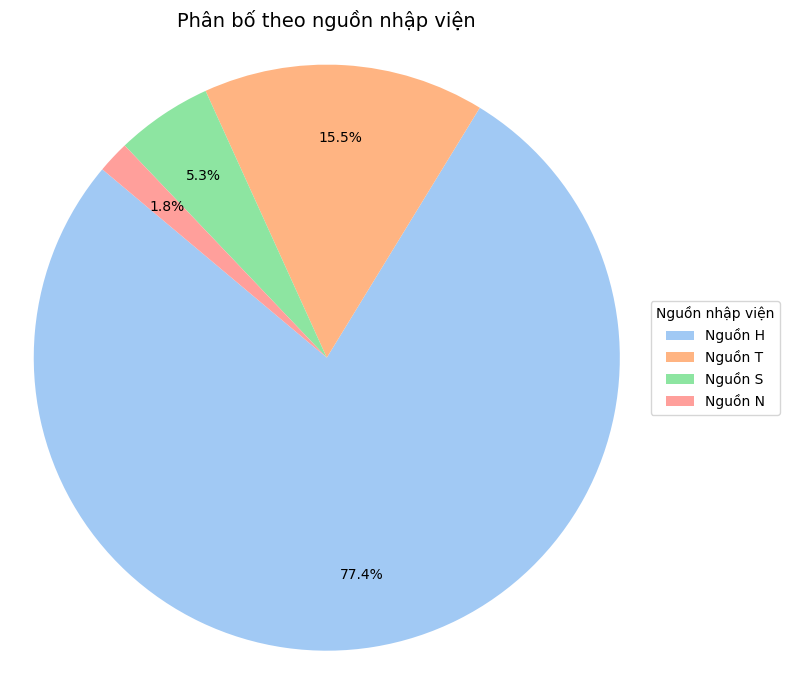

In [25]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- PHÂN TÍCH NGUỒN NHẬP VIỆN ---


# Đếm và xử lý dữ liệu
admsource_dist = admission_df['admsource'].value_counts(dropna=False)
total = admsource_dist.sum()

if not admsource_dist.empty:
    admsource_labels = admsource_dist.index.astype(str)
    admsource_labels = ['Không rõ' if x == 'nan' else f'Nguồn {x}' for x in admsource_labels]

    # Tạo bảng thống kê
    admsource_df = pd.DataFrame({
        'Nguồn nhập viện': admsource_labels,
        'Số lượng': admsource_dist.values,
        'Tỷ lệ (%)': (100 * admsource_dist.values / total).round(2)
    })

    # Hiển thị bảng HTML đẹp
    html_table = admsource_df.to_html(index=False, classes='table table-striped table-bordered', border=0)
    custom_style = """
    <style>
        h4.table-title {
            text-align: center;
            color: white;
            margin-top: 30px;
        }
        .table {
            width: 50%;
            margin: 0 auto 30px auto;
            border-collapse: collapse;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            font-size: 14px;
            color: #ffffff;
            background-color: #1e1e1e;
            border: 1px solid #444;
        }
        .table th {
            background-color: #2e2e2e;
            color: #00ffff;
            text-align: center;
            padding: 10px;
            border: 1px solid #555;
        }
        .table td {
            text-align: center;
            padding: 8px;
            border: 1px solid #444;
        }
        .table tbody tr:nth-child(even) {
            background-color: #2a2a2a;
        }
        .table tbody tr:nth-child(odd) {
            background-color: #1e1e1e;
        }
    </style>
    """


    # Tạo bảng HTML
    html_table = admsource_df.to_html(index=False, classes='table', border=0)

    # Hiển thị tiêu đề và bảng căn giữa
    display(HTML(custom_style + "<h4 class='table-title'>📋 Bảng phân bố theo nguồn nhập viện</h4>" + html_table))


    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 7))
    colors = sns.color_palette("pastel")[0:len(admsource_labels)]

    wedges, texts, autotexts = plt.pie(
        admsource_dist,
        labels=None,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        textprops={'fontsize': 10},
        pctdistance=0.75
    )

    # Thêm chú giải
    plt.legend(
        wedges,
        admsource_labels,
        title="Nguồn nhập viện",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

    plt.title('Phân bố theo nguồn nhập viện', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Không có dữ liệu về nguồn nhập viện.")



# 🔹3.5. Phân tích theo loại nhập viện

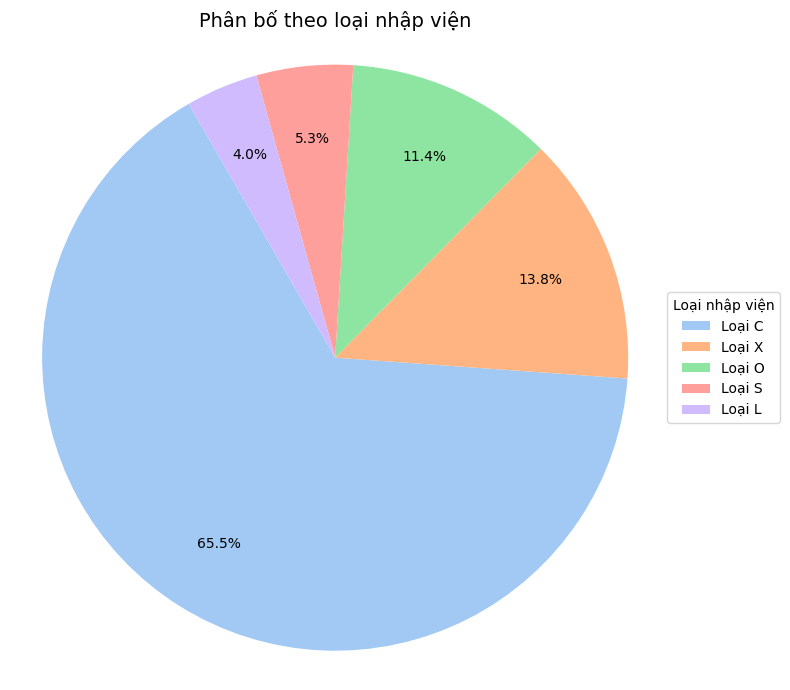

Loại nhập viện,Số lượng,Tỷ lệ (%)
Loại C,443,65.53
Loại X,93,13.76
Loại O,77,11.39
Loại S,36,5.33
Loại L,27,3.99


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import HTML, display



# Đếm số lượng từng loại
admtype_dist = admission_df['admtype'].value_counts(dropna=False)
total = admtype_dist.sum()

# Gán nhãn
admtype_labels = admtype_dist.index.astype(str)
admtype_labels = ['Không rõ' if x == 'nan' else f'Loại {x}' for x in admtype_labels]

# Tạo DataFrame
admtype_df = pd.DataFrame({
    'Loại nhập viện': admtype_labels,
    'Số lượng': admtype_dist.values,
    'Tỷ lệ (%)': (100 * admtype_dist.values / total).round(2)
})

# In bảng console (tuỳ chọn)
# print(admtype_df.to_string(index=False))

# Vẽ biểu đồ tròn đẹp
plt.figure(figsize=(8, 7))
colors = sns.color_palette("pastel")[0:len(admtype_labels)]

wedges, texts, autotexts = plt.pie(
    admtype_dist,
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    startangle=120,
    textprops={'fontsize': 10},
    pctdistance=0.75
)

plt.legend(
    wedges,
    admtype_labels,
    title="Loại nhập viện",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title('Phân bố theo loại nhập viện', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# CSS bảng nền đen – chữ trắng – căn giữa
custom_style = """
<style>
    h4.table-title {
        text-align: center;
        color: white;
        margin-top: 30px;
        font-family: Arial, sans-serif;
    }
    .table {
        width: 50%;
        margin: 0 auto 30px auto;
        border-collapse: collapse;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-size: 14px;
        color: #ffffff;
        background-color: #1e1e1e;
        border: 1px solid #444;
    }
    .table th {
        background-color: #2e2e2e;
        color: #00ffff;
        text-align: center;
        padding: 10px;
        border: 1px solid #555;
    }
    .table td {
        text-align: center;
        padding: 8px;
        border: 1px solid #444;
    }
    .table tbody tr:nth-child(even) {
        background-color: #2a2a2a;
    }
    .table tbody tr:nth-child(odd) {
        background-color: #1e1e1e;
    }
</style>
"""

# Hiển thị bảng HTML đẹp
html_table = admtype_df.to_html(index=False, classes='table', border=0)
display(HTML(custom_style + "<h4 class='table-title'>📋 Bảng phân bố theo loại nhập viện</h4>" + html_table))


# 🔹3.6. Phân tích thời gian nằm viện theo nhóm tuổi

/tmp/ipython-input-27-550272872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  los_by_age = admission_df.groupby('age_group')['los'].mean().sort_values(ascending=False).round(1)


,Nhóm tuổi,Số ngày nằm viện trung bình
0,30-39,36.3
1,60+,19.8
2,40-49,11.2
3,50-59,10.8
4,10-19,7.8
5,0-9,7.5
6,20-29,6.2


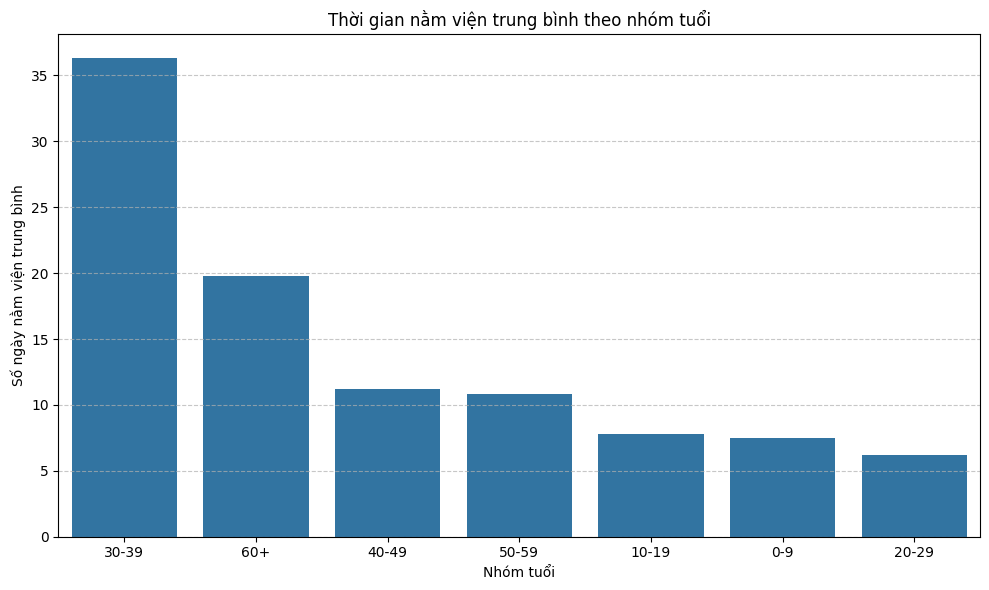

In [27]:
# Tính thời gian nằm viện trung bình theo nhóm tuổi
los_by_age = admission_df.groupby('age_group')['los'].mean().sort_values(ascending=False).round(1)

# Chuyển thành DataFrame để hiển thị đẹp hơn
los_by_age_table = los_by_age.reset_index()
los_by_age_table.columns = ['Nhóm tuổi', 'Số ngày nằm viện trung bình']

# Hiển thị bảng
from IPython.display import display
display(los_by_age_table)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=los_by_age_table, x='Nhóm tuổi', y='Số ngày nằm viện trung bình', order=los_by_age_table['Nhóm tuổi'])
plt.title('Thời gian nằm viện trung bình theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số ngày nằm viện trung bình')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🔹3.7. Phân tích theo DRG code (mã nhóm bệnh)

,Mã DRG,Số ca
0,I08A,82
1,I75A,47
2,X60A,45
3,I03A,32
4,I78A,27
5,X06A,26
6,X63A,23
7,I77A,21
8,I08B,19
9,J65A,16


/tmp/ipython-input-28-2798561430.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drg_table, x='Mã DRG', y='Số ca', palette='Purples_d')


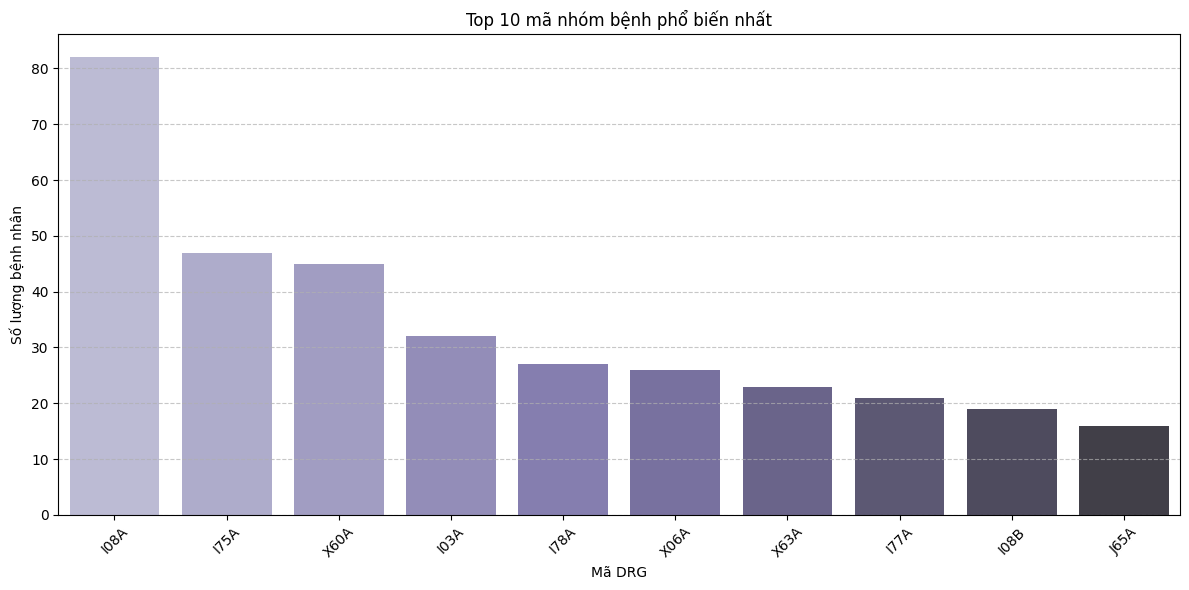

In [28]:
# Đếm tần suất xuất hiện của mã DRG
drg_dist = admission_df['nat_drg_code'].value_counts().head(10)

# Chuyển thành DataFrame
drg_table = drg_dist.reset_index()
drg_table.columns = ['Mã DRG', 'Số ca']

# Hiển thị bảng
from IPython.display import display
display(drg_table)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=drg_table, x='Mã DRG', y='Số ca', palette='Purples_d')
plt.title('Top 10 mã nhóm bệnh phổ biến nhất')
plt.xlabel('Mã DRG')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🔹3.8. Phân tích vị trí chẩn đoán thiếu máu trong danh sách chẩn đoán

,Vị trí chẩn đoán,Số ca
0,2,3
1,3,1
2,4,23
3,5,105
4,6,107
5,7,80
6,8,79
7,9,62
8,10,39
9,11,33


/tmp/ipython-input-29-2461927631.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_table, x='Vị trí chẩn đoán', y='Số ca', palette='Oranges_d')


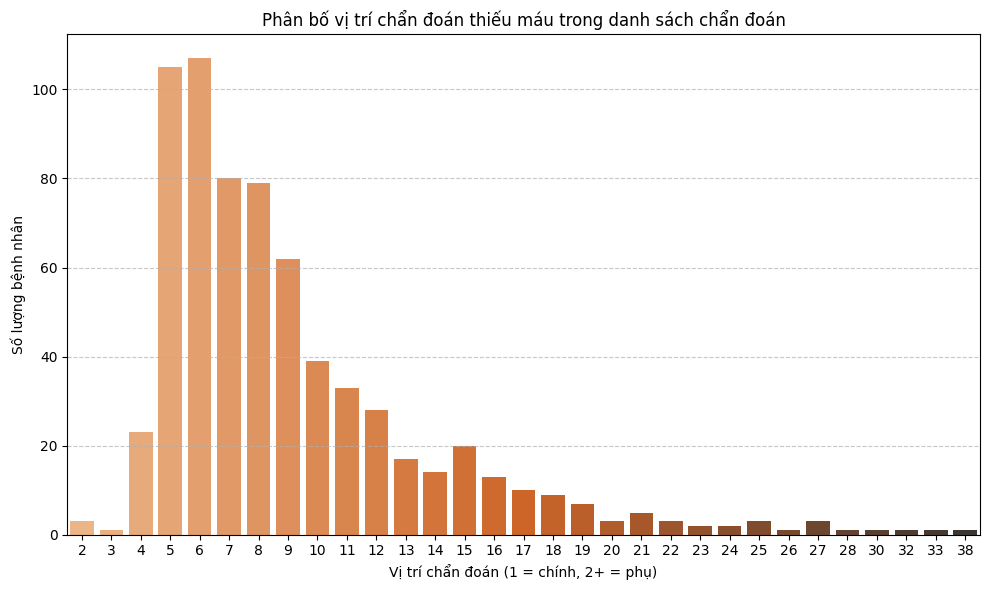

In [29]:
# Tính tần suất từng vị trí chẩn đoán
position_dist = diagnosis_df['position'].value_counts().sort_index()

# Chuyển thành DataFrame để trình bày đẹp hơn
position_table = position_dist.reset_index()
position_table.columns = ['Vị trí chẩn đoán', 'Số ca']

# Hiển thị bảng
from IPython.display import display
display(position_table)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=position_table, x='Vị trí chẩn đoán', y='Số ca', palette='Oranges_d')
plt.title('Phân bố vị trí chẩn đoán thiếu máu trong danh sách chẩn đoán')
plt.xlabel('Vị trí chẩn đoán (1 = chính, 2+ = phụ)')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🔹3.9. Đánh giá chất lượng dữ liệu

In [30]:
# Tỷ lệ thiếu trong bảng admission
missing_admission = admission_df.isnull().mean().sort_values(ascending=False).reset_index()
missing_admission.columns = ['Tên biến', 'Tỷ lệ thiếu']
missing_admission['Tỷ lệ thiếu (%)'] = (missing_admission['Tỷ lệ thiếu'] * 100).round(1)
missing_admission = missing_admission.drop(columns='Tỷ lệ thiếu')

print("\n📋 BẢNG: Tỷ lệ dữ liệu thiếu trong bảng admission")
from IPython.display import display
display(missing_admission)

# Tỷ lệ thiếu trong bảng diagnosis
missing_diagnosis = diagnosis_df.isnull().mean().sort_values(ascending=False).reset_index()
missing_diagnosis.columns = ['Tên biến', 'Tỷ lệ thiếu']
missing_diagnosis['Tỷ lệ thiếu (%)'] = (missing_diagnosis['Tỷ lệ thiếu'] * 100).round(1)
missing_diagnosis = missing_diagnosis.drop(columns='Tỷ lệ thiếu')

print("\n📋 BẢNG: Tỷ lệ dữ liệu thiếu trong bảng diagnosis")
display(missing_diagnosis)



📋 BẢNG: Tỷ lệ dữ liệu thiếu trong bảng admission


,Tên biến,Tỷ lệ thiếu (%)
0,Unnamed: 1,100.0
1,F13,100.0
2,weight,99.9
3,age_days,99.9
4,age_mths,99.6
5,age_group,67.8
6,age_years,0.0
7,admission_id,0.0
8,sameday,0.0
9,los,0.0



📋 BẢNG: Tỷ lệ dữ liệu thiếu trong bảng diagnosis


,Tên biến,Tỷ lệ thiếu (%)
0,admission_id,0.0
1,position,0.0
2,diagnosis,0.0
3,Other,0.0


# 🔹3.10. Phân tích sâu theo loại thiếu máu


👫 BẢNG: Phân bố giới tính theo loại thiếu máu


Gender,Nam,Nữ
diagnosis,,
D500,101,193
D508,31,36
D509,116,200


<Figure size 1000x600 with 0 Axes>

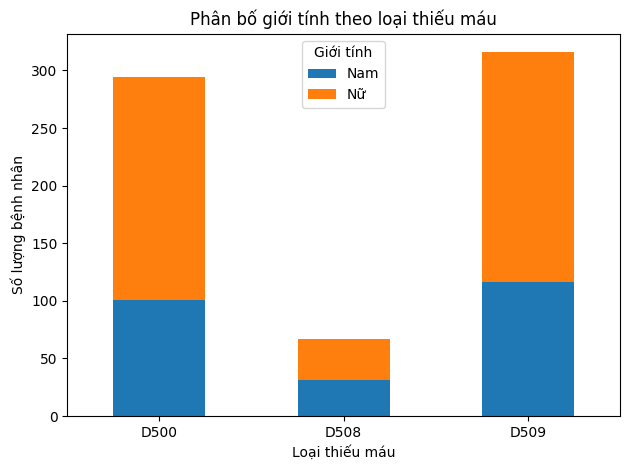


🎂 BẢNG: Phân bố độ tuổi theo loại thiếu máu


age_group,0-9,10-19,20-29,30-39,40-49,50-59,60+
diagnosis,,,,,,,
D500,3,4,14,10,12,22,45
D508,3,3,1,1,3,7,9
D509,4,5,6,9,10,19,29


<Figure size 1200x600 with 0 Axes>

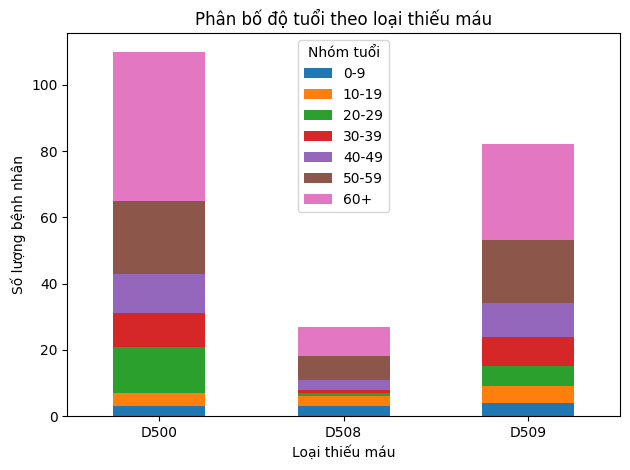


🛏️ BẢNG: Thời gian nằm viện trung bình theo loại thiếu máu


,Loại thiếu máu,Số ngày nằm viện trung bình
0,D500,12.9
1,D508,11.3
2,D509,15.9


/tmp/ipython-input-31-1145289833.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=los_by_diag, x='Loại thiếu máu', y='Số ngày nằm viện trung bình', palette='Blues_d')


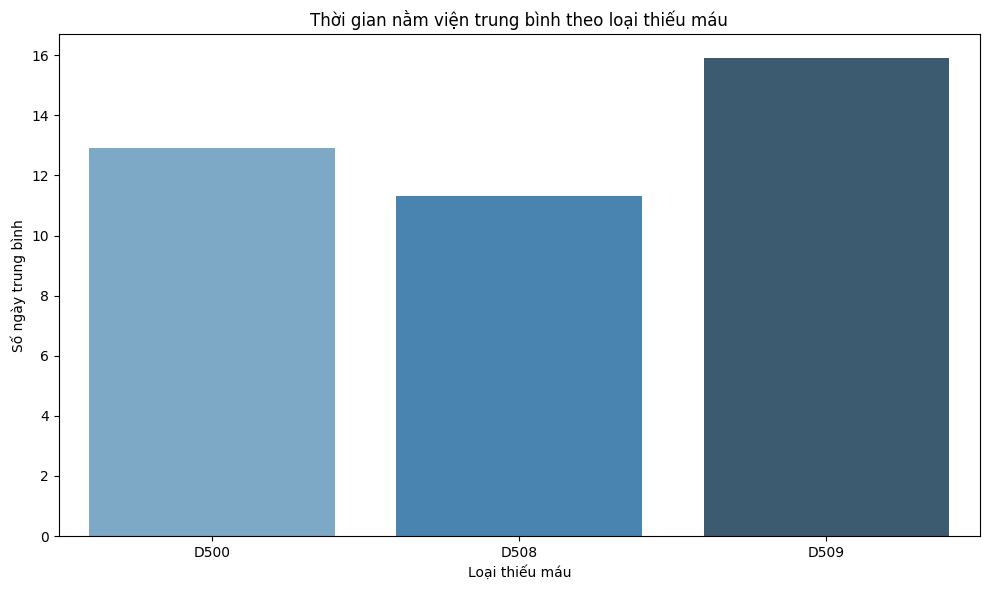

In [31]:
# Gộp dữ liệu
merged_df = admission_df.merge(diagnosis_df[['admission_id', 'diagnosis']], on='admission_id', how='left')

# Bảng phân bố giới tính theo loại thiếu máu
gender_by_diag = pd.crosstab(merged_df['diagnosis'], merged_df['Gender'].replace({1: 'Nam', 2: 'Nữ'}))
print("\n👫 BẢNG: Phân bố giới tính theo loại thiếu máu")
display(gender_by_diag)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
gender_by_diag.plot(kind='bar', stacked=True)
plt.title('Phân bố giới tính theo loại thiếu máu')
plt.xlabel('Loại thiếu máu')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks(rotation=0)
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

# Bảng phân bố độ tuổi theo loại thiếu máu
age_by_diag = pd.crosstab(merged_df['diagnosis'], merged_df['age_group'])
print("\n🎂 BẢNG: Phân bố độ tuổi theo loại thiếu máu")
display(age_by_diag)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
age_by_diag.plot(kind='bar', stacked=True)
plt.title('Phân bố độ tuổi theo loại thiếu máu')
plt.xlabel('Loại thiếu máu')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks(rotation=0)
plt.legend(title='Nhóm tuổi')
plt.tight_layout()
plt.show()

# Bảng thời gian nằm viện trung bình theo loại thiếu máu
los_by_diag = merged_df.groupby('diagnosis')['los'].mean().round(1).reset_index()
los_by_diag.columns = ['Loại thiếu máu', 'Số ngày nằm viện trung bình']
print("\n🛏️ BẢNG: Thời gian nằm viện trung bình theo loại thiếu máu")
display(los_by_diag)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=los_by_diag, x='Loại thiếu máu', y='Số ngày nằm viện trung bình', palette='Blues_d')
plt.title('Thời gian nằm viện trung bình theo loại thiếu máu')
plt.xlabel('Loại thiếu máu')
plt.ylabel('Số ngày trung bình')
plt.tight_layout()
plt.show()


# 🔹3.11. Phân tích theo mùa(nếu có dữ liệu ngày)


📅 15. BẢNG PHÂN BỐ SỐ CA NHẬP VIỆN THEO THÁNG:

 Tháng  Số ca nhập viện
   1.0               26
   2.0               10
   3.0               11
   4.0               15
   5.0               12
   6.0               10
   7.0                4
   8.0               13
   9.0                7
  10.0                9
  11.0                5
  12.0                6


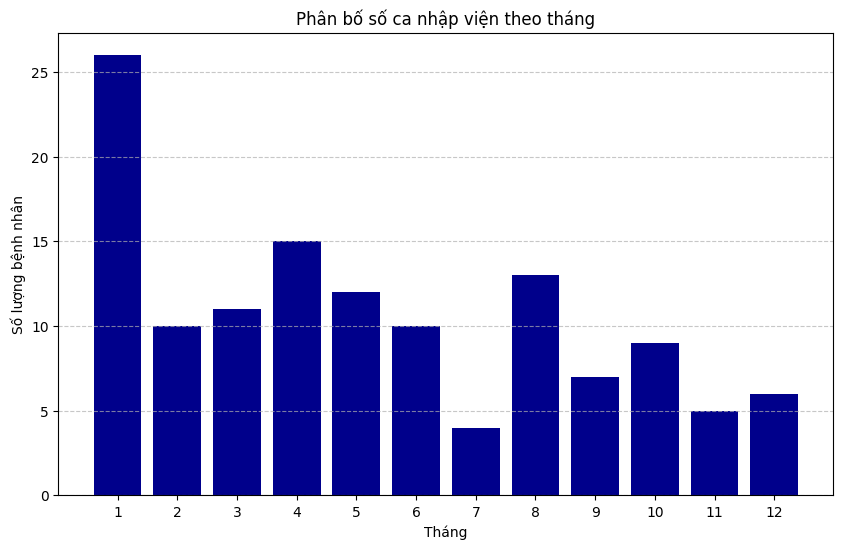

In [32]:
# Phân tích theo mùa (nếu có dữ liệu ngày)
# Giả sử admission_id chứa thông tin ngày (2 chữ số đầu là năm, 2 tiếp theo là tháng)
try:
    # Trích xuất năm-tháng từ admission_id
    merged_df['admission_date'] = pd.to_datetime(merged_df['admission_id'].astype(str).str[:4], format='%y%m', errors='coerce')
    merged_df['month'] = merged_df['admission_date'].dt.month

    # Đếm số ca theo tháng
    monthly_dist = merged_df['month'].value_counts().sort_index()

    # Chuyển sang DataFrame để hiển thị đẹp hơn
    monthly_table = pd.DataFrame({
        'Tháng': monthly_dist.index,
        'Số ca nhập viện': monthly_dist.values
    }).sort_values('Tháng')

    # In bảng
    print("\n📅 15. BẢNG PHÂN BỐ SỐ CA NHẬP VIỆN THEO THÁNG:\n")
    print(monthly_table.to_string(index=False))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_table['Tháng'], monthly_table['Số ca nhập viện'], color='darkblue')
    plt.title('Phân bố số ca nhập viện theo tháng')
    plt.xlabel('Tháng')
    plt.ylabel('Số lượng bệnh nhân')
    plt.xticks(monthly_table['Tháng'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

except Exception as e:
    print("\n⚠️ Không thể trích xuất thông tin ngày từ dữ liệu:", e)


# 🔹3.12. Phân tích ma trận tương quan giữa tuổi, thời gian nằm viện và cân nặng

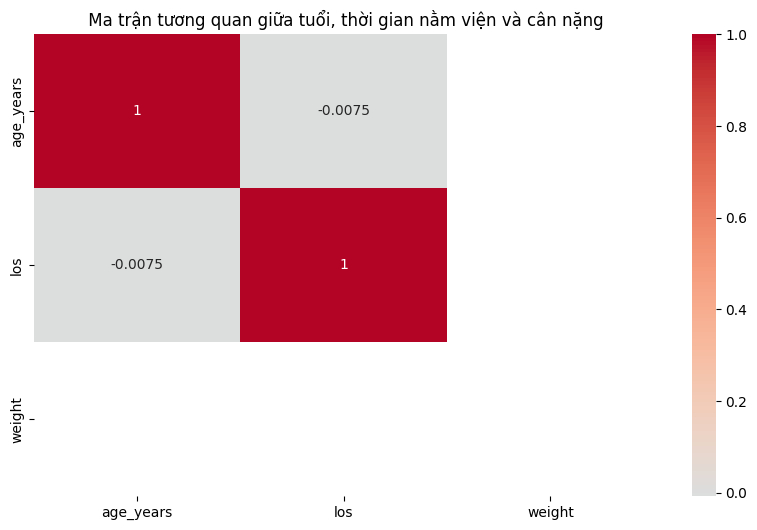

                            OLS Regression Results                            
Dep. Variable:                    los   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9569
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.385
Time:                        08:01:36   Log-Likelihood:                -3156.7
No. Observations:                 676   AIC:                             6319.
Df Residuals:                     673   BIC:                             6333.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.1627      3.852      4.196      

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Tính toán ma trận tương quan
correlation_matrix = admission_df[['age_years', 'los', 'weight']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(' Ma trận tương quan giữa tuổi, thời gian nằm viện và cân nặng')
plt.show()

# Mã hóa giới tính: Nam = 0, Nữ = 1 (nếu chưa có cột mã hóa)
if 'Gender_code' not in admission_df.columns:
    admission_df['Gender_code'] = admission_df['Gender'].map({'Nam': 0, 'Nữ': 1})

# Chuẩn bị dữ liệu cho hồi quy tuyến tính
reg_df = admission_df[['age_years', 'Gender_code', 'los']].dropna()

X = reg_df[['age_years', 'Gender_code']]
X = sm.add_constant(X)  # thêm hệ số chặn
y = reg_df['los']

# Hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In kết quả
print(model.summary())



🔍 Kết quả kiểm định ANOVA:
F-statistic: 2.49
P-value: 0.0217
👉 Có sự khác biệt có ý nghĩa thống kê giữa các nhóm tuổi.


/tmp/ipython-input-34-2286229434.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["los"].values for _, group in anova_data.groupby("age_group")]


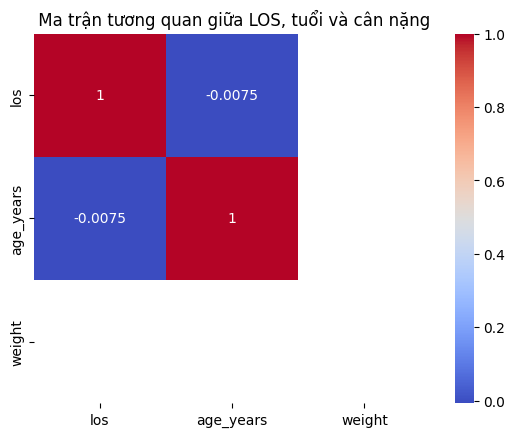

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Phân nhóm tuổi
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60+"]
admission_df["age_group"] = pd.cut(admission_df["age_years"], bins=bins, labels=labels, right=False)

# Kiểm định ANOVA
anova_data = admission_df.dropna(subset=["age_group", "los"])
groups = [group["los"].values for _, group in anova_data.groupby("age_group")]
f_stat, p_value = f_oneway(*groups)

print("🔍 Kết quả kiểm định ANOVA:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("👉 Có sự khác biệt có ý nghĩa thống kê giữa các nhóm tuổi.")
else:
    print("👉 Không có sự khác biệt đáng kể giữa các nhóm tuổi.")

# Ma trận tương quan
corr_matrix = admission_df[["los", "age_years", "weight"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(" Ma trận tương quan giữa LOS, tuổi và cân nặng")
plt.show()

# 🔹3.13. Phân tích theo nhóm nguy cơ cao

In [35]:
import pandas as pd

# Nhóm bệnh nhân có thời gian nằm viện dài bất thường (LOS > 30 ngày)
high_risk = admission_df[admission_df['los'] > 30]
normal_risk = admission_df[admission_df['los'] <= 30]

# Tính toán các chỉ số cho từng nhóm
comparison_table = pd.DataFrame({
    'High Risk': {
        'Số lượng': len(high_risk),
        'Độ tuổi trung bình': high_risk['age_years'].mean(),
        'Tỷ lệ nữ (%)': (high_risk['Gender'] == 2).mean() * 100,
        'Thời gian nằm viện TB': high_risk['los'].mean()
    },
    'Normal Risk': {
        'Số lượng': len(normal_risk),
        'Độ tuổi trung bình': normal_risk['age_years'].mean(),
        'Tỷ lệ nữ (%)': (normal_risk['Gender'] == 2).mean() * 100,
        'Thời gian nằm viện TB': normal_risk['los'].mean()
    }
})

# Hiển thị bảng
print("📊 Bảng so sánh nhóm nguy cơ cao vs nhóm thông thường:\n")
print(comparison_table.round(1))



📊 Bảng so sánh nhóm nguy cơ cao vs nhóm thông thường:

                       High Risk  Normal Risk
Số lượng                    66.0        610.0
Độ tuổi trung bình          72.7         72.5
Tỷ lệ nữ (%)                 0.0          0.0
Thời gian nằm viện TB       58.2          9.3


# 🔹3.14. Xây dựng mô hình dự đoán (Machine Learning)

✅ Độ chính xác của mô hình Random Forest: 50.25%

🔍 Báo cáo phân loại:

              precision    recall  f1-score   support

           0       0.42      0.41      0.42        88
           1       0.56      0.57      0.57       115

    accuracy                           0.50       203
   macro avg       0.49      0.49      0.49       203
weighted avg       0.50      0.50      0.50       203



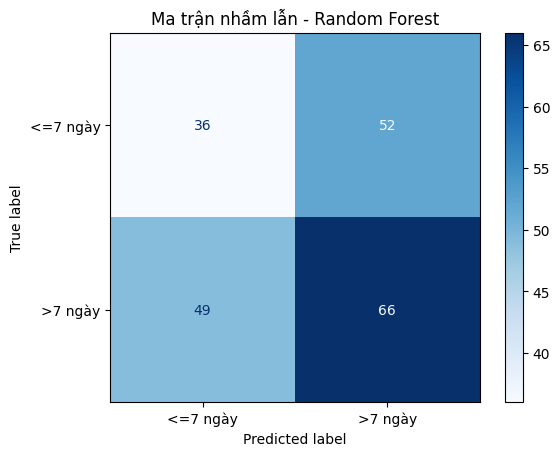

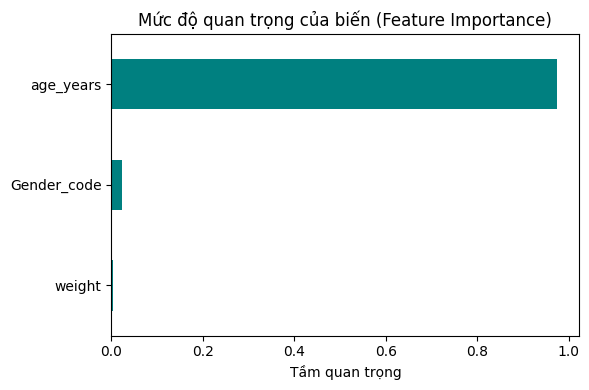

/tmp/ipython-input-36-2944257339.py:70: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


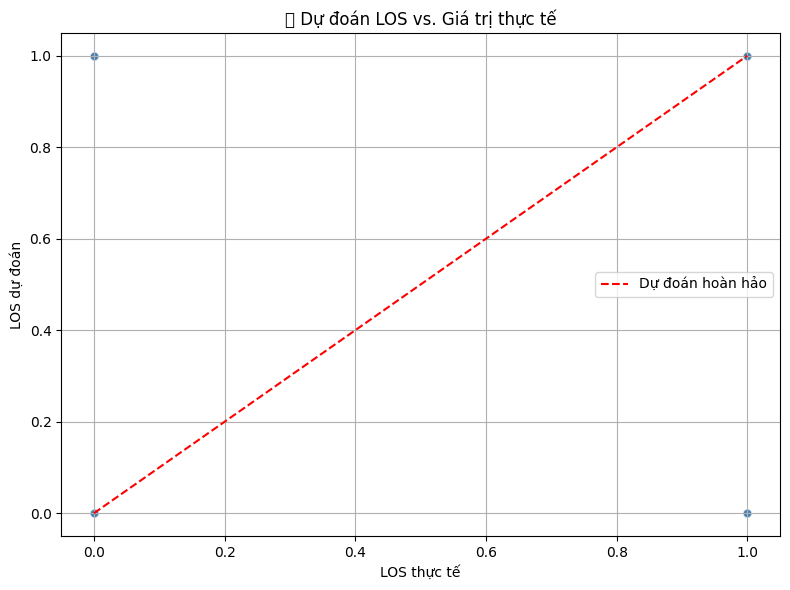

/tmp/ipython-input-36-2944257339.py:81: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


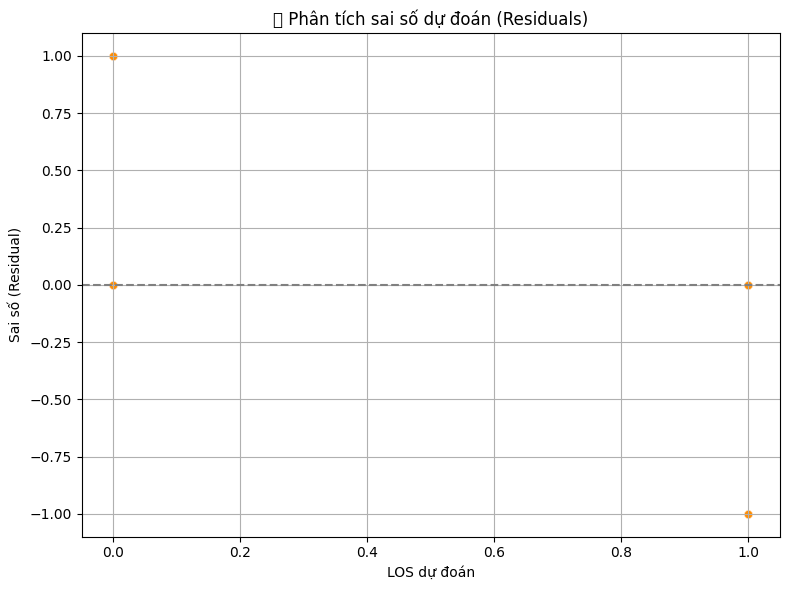

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 🌟 Bước 1: Mã hóa giới tính (Nam = 0, Nữ = 1)
admission_df['Gender_code'] = admission_df['Gender'].map({'Nam': 0, 'Nữ': 1})

# 🌟 Bước 2: Tạo biến mục tiêu: nằm viện dài ngày (>7 ngày)
admission_df['long_stay'] = (admission_df['los'] > 7).astype(int)

# 🌟 Bước 3: Chọn các biến đầu vào
X = admission_df[['age_years', 'Gender_code', 'weight']].fillna(0)
y = admission_df['long_stay']

# 🌟 Bước 4: Chia dữ liệu và huấn luyện mô hình
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🌟 Bước 5: Đánh giá mô hình
accuracy = model.score(X_test, y_test)
print(f"✅ Độ chính xác của mô hình Random Forest: {accuracy:.2%}")

# ⚡ Classification report (Precision, Recall, F1)
y_pred = model.predict(X_test)
print("\n🔍 Báo cáo phân loại:\n")
print(classification_report(y_test, y_pred))

# 📊 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=7 ngày", ">7 ngày"])
disp.plot(cmap='Blues')
plt.title("Ma trận nhầm lẫn - Random Forest")
plt.grid(False)
plt.show()

# 📈 Feature importance (giống varImp bên R)
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
feat_imp.plot(kind='barh', color='teal')
plt.title("Mức độ quan trọng của biến (Feature Importance)")
plt.xlabel("Tầm quan trọng")
plt.tight_layout()
plt.show()

# Tạo eval_df nếu chưa có
eval_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": model.predict(X_test)
})
eval_df["Residual"] = eval_df["Actual"] - eval_df["Predicted"]

# 1️⃣ Biểu đồ scatter: Dự đoán vs Thực tế
plt.figure(figsize=(8, 6))
sns.scatterplot(data=eval_df, x="Actual", y="Predicted", color="steelblue", alpha=0.6)
plt.plot([eval_df["Actual"].min(), eval_df["Actual"].max()],
         [eval_df["Actual"].min(), eval_df["Actual"].max()],
         color='red', linestyle='--', label="Dự đoán hoàn hảo")
plt.title("🔹 Dự đoán LOS vs. Giá trị thực tế")
plt.xlabel("LOS thực tế")
plt.ylabel("LOS dự đoán")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Biểu đồ residuals: Sai số dự đoán
plt.figure(figsize=(8, 6))
sns.scatterplot(data=eval_df, x="Predicted", y="Residual", color="darkorange", alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("🔸 Phân tích sai số dự đoán (Residuals)")
plt.xlabel("LOS dự đoán")
plt.ylabel("Sai số (Residual)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import ttest_ind

# Kiểm tra sự khác biệt thời gian nằm viện giữa nam và nữ
male_los = admission_df[admission_df['Gender'] == 1]['los']
female_los = admission_df[admission_df['Gender'] == 2]['los']
t_stat, p_value = ttest_ind(male_los, female_los, nan_policy='omit')

print(f"Kiểm định t-test:\nT-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê")
else:
    print("Không có sự khác biệt có ý nghĩa")

Kiểm định t-test:
T-statistic = nan, p-value = nan
Không có sự khác biệt có ý nghĩa


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Xây nhãn: LOS > 7 được coi là "nằm viện lâu"
admission_df["long_stay"] = (admission_df["los"] > 7).astype(int)

# Biến đầu vào
X = admission_df[["age_years", "weight"]].fillna(0)
y = admission_df["long_stay"]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("📈 Báo cáo mô hình:")
print(classification_report(y_test, y_pred))
print("🔍 Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))


📈 Báo cáo mô hình:
              precision    recall  f1-score   support

           0       0.47      0.36      0.40        59
           1       0.58      0.69      0.63        77

    accuracy                           0.54       136
   macro avg       0.52      0.52      0.52       136
weighted avg       0.53      0.54      0.53       136

🔍 Ma trận nhầm lẫn:
[[21 38]
 [24 53]]
